# 1.  El objeto `doc` en spaCy. 

`Doc` es una variable que contiene una secuencia de tokens. Al pasarle un texto a `nlp`, se genera una variable `Doc` automáticamente. Luego esa variable `Doc` nos permite trabajar con tokens sin necesidad de hacer ningún procesamiento posterior.

Recordemos que debemos **siempre** comenzar nuestras notebooks descargando el modelo de spaCy que vayamos a ocupar. Los modelos están en la página de spaCy, así como la instrucción que debemos copiar/pegar en la notebook.

En este caso usaremos el modelo `es_core_news_sm`.

* No olvidar siempre poner un `!` al inicio de la instrucción, pues Colab lo requiere para saber que es un comando de descarga y no de Python.

In [ ]:
! python -m spacy download es_core_news_sm

     |████████████████████████████████| 16.2 MB 12.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


Comenzaremos por analizar un tuit guardado como string en una variable.

In [ ]:
import spacy
import es_core_news_sm

nlp = es_core_news_sm.load()

texto = " Los anuncios de los conciertos en México son cada vez más y aunque nuestra cartera ya no sabe cómo sobreponerse, uno hace lo que sea con tal de poder asistir. Este 18 de abril tres shows más se agregaron a la interminable lista de conciertos de este año (que pueden checar por acá), pues Rosalía anunció su regreso oficial a tierras mexicanas. "

doc = nlp(texto)

In [ ]:
len(doc)

69

`doc` contiene a todos los tokens del texto que se le pasó a `nlp`. Por lo tanto, para acceder a un token en particular, se indica la posición del token con corchetes (recordemos que la variable `doc` contiene muchos elementos dentro de ella; por lo tanto se accede a sus elementos como si fuera una variable tipo lista)

In [ ]:
doc[31]

asistir

Si se añade `.sent` a un token en específico, Python muestra la oración a la cual pertenece ese token.

En el siguiente ejemplo indicamos a Python **un solo token** al señalar el ínice de dicho token dento de la variable `doc`.

In [ ]:
doc[31].sent

 Los anuncios de los conciertos en México son cada vez más y aunque nuestra cartera ya no sabe cómo sobreponerse, uno hace lo que sea con tal de poder asistir.

Recordemos que para imprimir todos los tokens dentro del objeto `doc` neceesitamos escribir un ciclo `for`, pues esto nos permite recorrer todos los elementos dentro de una variable que contenga varios elementos (en este caso, `doc` contiene varios elementos).

In [ ]:
for token in doc:
  print(token.text)

 
Los
anuncios
de
los
conciertos
en
México
son
cada
vez
más
y
aunque
nuestra
cartera
ya
no
sabe
cómo
sobreponerse
,
uno
hace
lo
que
sea
con
tal
de
poder
asistir
.
Este
18
de
abril
tres
shows
más
se
agregaron
a
la
interminable
lista
de
conciertos
de
este
año
(
que
pueden
checar
por
acá
)
,
pues
Rosalía
anunció
su
regreso
oficial
a
tierras
mexicanas
.


# 2. `doc.noun_chunks`

El método `.noun_chunks` regresa todos los tokens con sustantivos.

Guardamos el resultado de `doc.noun_chunks` en una lista. Luego guardamos esa lista en la variable llamada `chunks`.

In [ ]:
tokens_sustantivos = list(doc.noun_chunks)

Imprimimos la lista `tokens_sustantivos`

In [ ]:
tokens_sustantivos

[Los anuncios,
 los conciertos,
 México,
 cada vez,
 nuestra cartera,
 cómo,
 sobreponerse,
 uno,
 que,
 tal,
 Este,
 abril,
 shows,
 se,
 la interminable lista,
 conciertos,
 este año,
 que,
 acá,
 Rosalía,
 su regreso,
 tierras]

# 3. `span`

`span` es un objeto que contiene un pedazo de `Doc`. Si `Doc` son todos los tokens de un texto, `span` es sólo algunos tokens de ese `Doc`.


In [ ]:
texto = "Los niños juegan en el parque con los adultos."

doc = nlp(texto)

span = doc[1:4]

Imprimios la variable `span`

In [ ]:
span

niños juegan en

Para obtener la similitud semántica entre dos spans, primero creamos dos variables spans. Luego usamos `.similarity` para calcular dicha similitud.

In [ ]:
span1 = doc[0:2]
span2 = doc[7:9]

print(span1, span2)

Los niños los adultos


In [ ]:
span1.similarity(span2)

/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.7908761

El resultado de `.similarity` va de `0` a `1`. Entre más cerca del `1` este el resultado, mayor similitud semántica entre los spans analizados.

# 4. Modelos en spaCy

- Qué son: Algoritmos entrenados con un conjunto de datos. El algoritmo 'aprende' de los textos, y spaCy pone a disposición esos algoritmos entrenados. Estos modelos nos permiten analizar texto usando esos algoritmos, sin necesidad de nosotros mismos hacer algoritmos.
- Cómo cargarlos: Con `import nombre_del_modelo`
- Cómo identificar sus diferencias: En la página de spaCy se indican el tamaño, corpora de entrenamiento, y lengua de los modelos disponibles.


[Modelos de spaCy en español](https://spacy.io/models/es)

# 5. Dependencias sintácticas

Las dependencias sintácticas de spaCy nos permiten hacer análisis léxico de nuestros textos. Cada token es etiquetado con un dependencia sintáctica, la cual se obtiene dependiendo de la estructura de las oraciones ingresadas.

In [ ]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

En la siguiente celda de código, el índice de `doc` permite obtener las dependencias sintácticas de la token a la **izquierda** del token indicado con el índice. En el ejemplo siguiente, `.left` le indica a Python que nos devuelva sólo los tokens dependietes sintácticamente a la izquierda del token en la posición `4`.

In [ ]:
doc = nlp('I want a green apple.')

[w for w in doc[4].lefts]

[a, green]

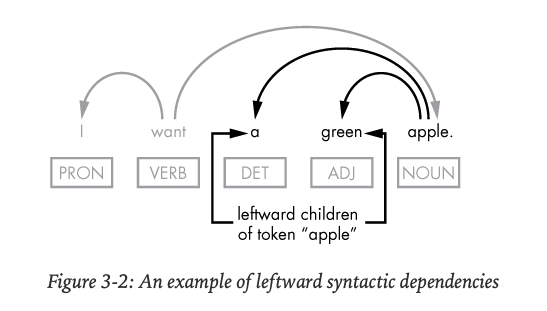

# 6. Extacción de tokens a partir de sus dependencias sintácticas

Similar al ejemplo anterior, en la celda siguiente indicamos a Python que nos devuelva todas las tokens dependientes sintácticamente a ambos lados del token indicado en el índice de la variable `doc`.

In [ ]:
[w for w in doc[4].children]

[a, green]

A continuación obtenemos todos los tokens de dos oraciones pasadas a la variable `nlp`. Luego imprimimos los tokens, pero segmentados por oraciones. Por eso obtenemos al final dos listas: cada una contiene los tokens de cada oración.

En los ejemplos anteriores habíamos obtenido los tokens de varias oraciones sin separarlas en varias listas de acuerdo a sus oraciones.

In [ ]:
doc = nlp('A severe storm hit the beach. It started to rain.')

for sent in doc.sents:
  print([sent[i] for i in range(len(sent))])

[A, severe, storm, hit, the, beach, .]
[It, started, to, rain, .]


# 7. Ejercicio de repaso: Extracción de características lingüísticas de un texto

Paso 1: Definir la ruta de Drive en la cual esta guardado nuestro archivo.

Paso 2: Cargar esos datos en una variable llamada `datos`. En este caso el comando `sep="\t"` es necesario cuando nuestros datos están en formato `.tsv`.

Paso 3: Imprimir la variable `datos`.

In [ ]:
import pandas as pd

ruta = '.../EXIST2021_training.tsv'

datos = pd.read_csv(ruta, sep="\t")
datos

,test_case,id,source,language,text,task1,task2
0,EXIST2021,1,twitter,en,"She calls herself ""anti-feminazi"" how about sh...",sexist,ideological-inequality
1,EXIST2021,2,twitter,en,"Now, back to these women, the brave and the be...",non-sexist,non-sexist
2,EXIST2021,3,twitter,en,"@CurvyBandida @Xalynne_B Wow, your skirt is ve...",sexist,objectification
3,EXIST2021,4,twitter,en,@AurelieGuiboud Incredible! Beautiful!But I l...,non-sexist,non-sexist
4,EXIST2021,5,twitter,en,i find it extremely hard to believe that kelly...,non-sexist,non-sexist
...,...,...,...,...,...,...,...
6972,EXIST2021,6973,twitter,es,"Estamos igual sin pareja, pero puedes besar a ...",non-sexist,non-sexist
6973,EXIST2021,6974,twitter,es,2020 hijo de re mil putas,non-sexist,non-sexist
6974,EXIST2021,6975,twitter,es,SEGURAMENTE ESTA CHICA NO COBRA EL DINERO QUE ...,non-sexist,non-sexist
6975,EXIST2021,6976,twitter,es,@safetyaitana mi madre dice q va fea y i agree,sexist,objectification


`nombre_variable.columns` imprime las columnas de la variable que contiene nuestros datos.

In [ ]:
datos.columns

Index(['test_case', 'id', 'source', 'language', 'text', 'task1', 'task2'], dtype='object')

Paso 5: Eliminar las columnas que no nos sirvan. En este caso eliminaremos `test_case`, `id`, `source`, y `task2` con ayuda de `.drop`. 

Para cambiar las columnas que queremos quitar de la variable `datos`, sólo debemos modificar los nombres escritos dentro de `.drop`.

In [ ]:
datos.drop(['test_case', 'id', 'source', 'task1', 'task2'], axis=1, inplace=True)
datos

,language,text
0,en,"She calls herself ""anti-feminazi"" how about sh..."
1,en,"Now, back to these women, the brave and the be..."
2,en,"@CurvyBandida @Xalynne_B Wow, your skirt is ve..."
3,en,@AurelieGuiboud Incredible! Beautiful!But I l...
4,en,i find it extremely hard to believe that kelly...
...,...,...
6972,es,"Estamos igual sin pareja, pero puedes besar a ..."
6973,es,2020 hijo de re mil putas
6974,es,SEGURAMENTE ESTA CHICA NO COBRA EL DINERO QUE ...
6975,es,@safetyaitana mi madre dice q va fea y i agree


Ahora checamos que efectivamente las columnas que queríamos eliminar ya no esten en la variable `datos`.

In [ ]:
datos.columns

Index(['language', 'text'], dtype='object')

Paso 6: Obtener el número de celdas de la columna `language` que contienen a los valores `es` y `en` utilizando `.value_counts(normalize=True) * 100`.

Si quisieramos cambiar la columna a analizar, debemos cambiar sólo `language`.

In [ ]:
datos['language'].value_counts(normalize=True) * 100

es    50.752472
en    49.247528
Name: language, dtype: float64

Paso 7: Eliminar los tuits que esten en inglés. Para esto, borraremos todos aquellos que se encuentren en la columna `language` con la palabra `en`.

Para borrar valores diferentes a `en`, sólo debemos cambiar eso en la celda siguiente.

Para cambiar la columna en la cual queremos borrar un valor en específico sólo debemos cambiar `language`.

In [ ]:
datos = datos[datos['language'] != 'en']
datos

,language,text
3436,es,Nadie te va a tratar tan bien como un hombre q...
3437,es,"@lindagisela74 Que rica putita obediente, afor..."
3438,es,@BicireporteraDF Yo lo hice a los 18 años por ...
3439,es,las cosas q sueño son indicios de que yo enrea...
3440,es,"Pero a la niña le gustó desde que lo vió, así ..."
...,...,...
6972,es,"Estamos igual sin pareja, pero puedes besar a ..."
6973,es,2020 hijo de re mil putas
6974,es,SEGURAMENTE ESTA CHICA NO COBRA EL DINERO QUE ...
6975,es,@safetyaitana mi madre dice q va fea y i agree


Obtenemos nuevamente el porcentaje de celdas de la variable `valores` en la columna `language` para revisar que efectivamente borramos todas las celdas que contenían a `en`.

In [ ]:
datos['language'].value_counts(normalize=True) * 100

es    100.0
Name: language, dtype: float64

Paso 8: Haremos una lista que contenga sólo lo que está en la columna `text`.

`str` indica que lo que este en `tuit` sea un string. Esto es sólo una manera de asegurar que estamos trabajando con texto y así evitar problemas en caso de que hubiera números en `datos['text']`.

In [ ]:
tuits = []

for tuit in datos['text']:
  tuits.append(str(tuit))

tuits

Revisamos lo que está en la posición `3` de la nueva lista `tuits`.

In [ ]:
tuits[2]

'@BicireporteraDF Yo lo hice a los 18 años por la carretera libre a Veracruz y ahora hay más carreteras veras que si puedes mujer'

Revisamos la longitud de la lista `tuits` con la función `len`.

In [ ]:
len(tuits)

3541

Paso 9: Sacaremos los tokens de todos los tuits, y los guardaremos en una lista.

Tenemos dos `for`s; uno recorre cada elemento dentro de la lista `tuits`, y el otro recorre cada token dentro de cada elemento.

Por ejemplo, el elemento en la posición `2` de `tuits`, es todo el tuit 

*@BicireporteraDF Yo lo hice a los 18 años por la carretera libre a Veracruz y ahora hay más carreteras veras que si puedes mujer*. 

En el primer ciclo `for` se analiza ese tuit, y en el segundo `for` se analiza **cada token** de ese tuit. O sea, ese segundo `for` primero analiza *@BicireporteraDF*, luego `Yo`, etc. hasta que analiza todos los elementos de ese tuit. Una vez terminado, sigue a `tuit[3]` y repite lo mismo hasta que llega al final de `tuit`.

In [ ]:
import spacy
import es_core_news_sm

nlp = es_core_news_sm.load()

tokens_texto = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    tokens_texto.append(token.text)

In [ ]:
tokens_texto

In [ ]:
len(tokens_texto)

115775

Pequeño paréntesis: si pasamos una lista a `set()`, obtenemos sólo los elementos únicos de esa lista. En el ejemplo siguiente, al pasar a `lista1` por `set` obtenermos `a, b, c`, pues `a` estaba repetido en `lista1`.

In [ ]:
lista1 = ['a', 'b', 'c', 'a']
len(lista1)

4

In [ ]:
set(lista1)

{'a', 'b', 'c'}

In [ ]:
len(set(lista1))

3

Volviendo a los datos de análisis de lenguaje sexista, pasamos todos los tokens de `tokens_textop` por un `set` para obtener los tokens únicos. 

In [ ]:
numero_palabras_unicas = len(set(tokens_texto))
numero_palabras_unicas

21716

Veamos la diversidad léxica en los tuits. Para esto dividiremos el número de palabras únicas entre el número total de palabras.

$diversidad \, léxica = \frac{número \, de  \, palabras \, únicas}{número \, total \, de \, palabras \, en \, todos \, los \, tuits}$

Dividimos los tokens únicos entre todos los tokens para obtener la diversidad léxica en nuestros datos. Entre más elevado sea el número (de `0` a `100`) obtenido, eso indica que nuestro texto tiene menos diversidad léxica.

Entre menos diversidad léxica, menos palabras únicas tenemos.

In [ ]:
numero_palabras_unicas = len(set(tokens_texto))
numero_total_palabras = len(tokens_texto)

In [ ]:
diversidad_lexica = numero_palabras_unicas / numero_total_palabras
diversidad_lexica * 100

18.757071906715613

Paso 10: Obtenemos las partes del discurso de cada token en nuestro texto. Repetimos el proceso anterior con el cual obtuvimos los tokens, pero esta vez con `token.pos_` que devuelve las partes del discurso, y con `token.tag_` que regresa la explicación de cada `token.pos_`.

In [ ]:
partes_del_discurso = []
explicacion = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    partes_del_discurso.append(token.pos_)
    explicacion.append(token.tag_)

In [ ]:
len(partes_del_discurso)

115802

`Counter` es una función de la librería `collections` que toma una lista y nos permite obtener los elementos más frecuentes en esa lista utilizando sólamente `.most_common(número de elementos que queremos ver)`.

En el siguiente caso usamos un `Counter` en nuestra lista que contiene las partes del discurso de nuestros datos para obtener las `10` partes más comunes.

In [ ]:
from collections import Counter

contador_partes_del_discurso = Counter(partes_del_discurso)
contador_partes_del_discurso.most_common(10)

[('PROPN', 74616),
 ('PUNCT', 11847),
 ('NOUN', 10605),
 ('DET', 4219),
 ('X', 3395),
 ('VERB', 3173),
 ('ADP', 2064),
 ('ADJ', 1475),
 ('INTJ', 1185),
 ('PRON', 1107)]

Paso 11: Repetimos los pasos anteriores sólo cambiando `token.pos_` por `token.dep_`, y `token.tag_` por `spacy.explain(token.dep_)`.

In [ ]:
etiquetas_dependencias_gramaticales = []
explicacion_dependencias = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    etiquetas_dependencias_gramaticales.append(token.dep_)
    explicacion_dependencias.append(spacy.explain(token.dep_))

In [ ]:
etiquetas_dependencias_gramaticales

In [ ]:
contador_etiquetas_dependencias_gramaticales  = Counter(etiquetas_dependencias_gramaticales )
contador_etiquetas_dependencias_gramaticales.most_common(10)

[('compound', 48933),
 ('ROOT', 15278),
 ('punct', 12396),
 ('nmod', 5586),
 ('dobj', 4358),
 ('det', 4312),
 ('nsubj', 4165),
 ('appos', 3594),
 ('pobj', 2967),
 ('prep', 2949)]

Paso 12: Repetimos los pasos anteriores sólo cambiando `token.tag_` por `list(doc.noun_chunks)` para obtener los `noun_chunks` de nuestros datos dentro de una lista (por eso el `list`).

In [ ]:
tokens_sustantivos = []

for tuit in tuits:
  doc = nlp(tuit)
  tokens_sustantivos.append(list(doc.noun_chunks))

In [ ]:
tokens_sustantivos

Paso 13: Repetimos los pasos anteriores sólo cambiando `list(doc.noun_chunks)` por `token.is_alpha` para obtener **sólo** los tokens que contienen caracteres alfanuméricos (letras y/o números).

In [ ]:
tokens_con_alfanumericos = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    tokens_con_alfanumericos.append(token.is_alpha)

In [ ]:
contador_tokens_con_alfanumericos  = Counter(tokens_con_alfanumericos)
contador_tokens_con_alfanumericos.most_common(10)

[(True, 96648), (False, 19154)]

Paso 14: Repetimos los pasos anteriores sólo cambiando `token.is_alpha` por `token.is_lower` para obtener **sólo** los tokens que contienen caracteres con minúsculas.

In [ ]:
tokens_con_minusculas = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    tokens_con_minusculas.append(token.is_lower)

In [ ]:
contador_tokens_con_minusculas  = Counter(tokens_con_minusculas)
contador_tokens_con_minusculas.most_common(10)

[(True, 87954), (False, 27848)]

Paso 15: Repetimos los pasos anteriores sólo cambiando `token.is_lower` por `token.is_upper` para obtener **sólo** los tokens que contienen caracteres con mayúsculas.

In [ ]:
tokens_con_mayusculas = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    tokens_con_mayusculas.append(token.is_upper)

In [ ]:
contador_tokens_con_mayusculas  = Counter(tokens_con_mayusculas)
contador_tokens_con_mayusculas.most_common(10)

[(False, 112690), (True, 3085)]

Paso 16: Repetimos los pasos anteriores sólo cambiando `token.is_upper` por `token.is_punct` para obtener **sólo** los tokens que contienen caracteres con puntuación.

In [ ]:
tokens_de_signos_de_puntuacion = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    tokens_de_signos_de_puntuacion.append(token.is_punct)

In [ ]:
contador_tokens_de_signos_de_puntuacion = Counter(tokens_de_signos_de_puntuacion)
contador_tokens_de_signos_de_puntuacion.most_common(10)

[(False, 103189), (True, 12586)]

Paso 17: Repetimos los pasos anteriores sólo cambiando `token.is_punct` por `token.like_email` para obtener **sólo** los tokens que contienen caracteres que podrían ser de la forma de un email (por ejemplo, un token `nombre@gmail.com` muy probablemente sería marcado como True).

In [ ]:
tokens_email = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    tokens_email.append(token.like_email)

In [ ]:
contador_emails = Counter(tokens_email)
contador_emails.most_common(10)

[(False, 115775)]

Paso 18: Repetimos los pasos anteriores sólo cambiando `token.is_punct` por `token.is_oov` para obtener **sólo** los tokens que están fuera del vocabulario del modelo de spaCy que estamos utilizando.

Recordemos que los tokens *out of vocabulary (oov)* son aquellos que no se encuentran dentro del conjunto de datos con el que entrenaron al algoritmo, pero que sí están en nuestros datos. Por lo tanto spaCy marca como `oov` a aquellos tokens que no reconoce dentro de su modelo.

In [ ]:
tokens_fuera_de_vocabulario = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    tokens_fuera_de_vocabulario.append(token.is_oov)

In [ ]:
contador_tokens_fuera_de_vocabulario = Counter(tokens_fuera_de_vocabulario)
contador_tokens_fuera_de_vocabulario.most_common(10)

[(True, 115802)]

Paso 19: Repetimos los pasos anteriores pero ahora para obtener los lemas.

Recordemos que los lemas son la forma base de las tokens.

In [ ]:
lemmas = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    lemmas.append(token.lemma_)

In [ ]:
lemmas

Paso 20: Repetimos los pasos anteriores sólo cambiando `token.lemma` por `token.is_prefix` para obtener **sólo** los prefijos de los lemas en nuestros datos.

In [ ]:
for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    print(token.prefix_)

Paso 21: Obtenemos la diversidad léxica de nuestros datos, pero esta vez sólo considerando lemas y no todos los tokens. 

¿Cómo cambia este resultado a comparación de usar tokens?

In [ ]:
numero_palabras_unicas = len(set(lemmas))
numero_total_palabras = len(lemmas)

In [ ]:
diversidad_lexica = numero_palabras_unicas / numero_total_palabras
diversidad_lexica * 100

18.588625412341756